# EXERCICIO 1

In [1]:
# Import all the necessary libraries.
import numpy as np
import timeit
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.linear_model import Lasso
import functools

import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Import all the necessary libraries.
import numpy as np
import timeit
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.linear_model import Lasso
import functools

import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# Import all the necessary libraries.
import numpy as np
import timeit
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.linear_model import Lasso
import functools

import pandas as pd
import matplotlib.pyplot as plt


In [4]:
# Import all the necessary libraries.
import numpy as np
import timeit
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.linear_model import Lasso
import functools

import pandas as pd
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv('./poly_reg_p.csv', header=None)
                 
x = df[0].to_numpy()
y = df[1].to_numpy()
                 
x = x.reshape(len(x),1)
y = y.reshape(len(y),1)

include_bias= True

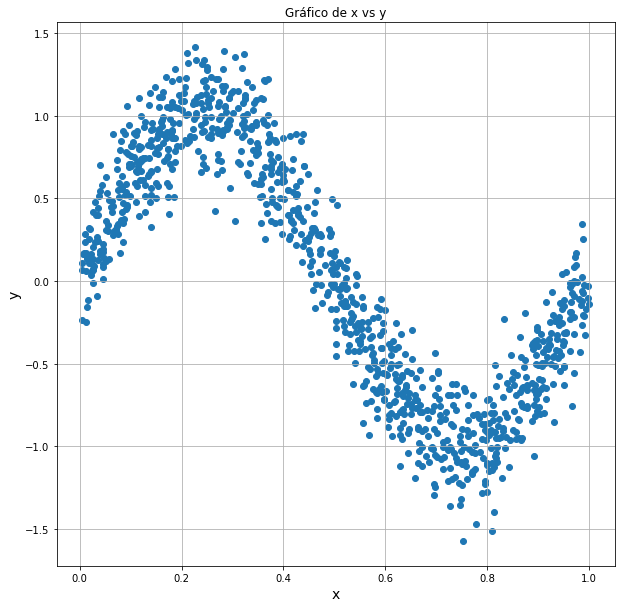

In [6]:
# Plot original data versus noisy version.
fig = plt.figure(figsize=(10,10))
plt.scatter(x, y)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid()
plt.title('Gráfico de x vs y')
#Show the plot.
plt.show()

In [7]:
max_range = 21

## Holdout (70-30)

In [8]:
# Split the whole set into random training and validation set.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)


mean_vec_train_holdout = []
mean_vec_test_holdout = []
std_vec_holdout = []
for d in range(1, max_range):
    # Instantiate a polynomial.
    poly_features = PolynomialFeatures(degree=d, include_bias=include_bias)
    # Instantiate a scaler.
    std_scaler = StandardScaler()
    # Instantiate a linear regressor.
    lin_reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    polynomial_regression.fit(x_train, y_train)
    
    y_train_predict = polynomial_regression.predict(x_train)
    y_test_predict = polynomial_regression.predict(x_test)
    
    mean_vec_train_holdout.append(np.sqrt(mean_squared_error(y_train, y_train_predict)))
    mean_vec_test_holdout.append(np.sqrt(mean_squared_error(y_test, y_test_predict)))
    #print(explained_variance_score(y_test, y_test_predict))


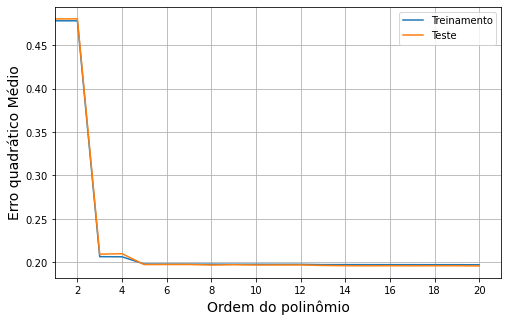

In [9]:

# Plot results.
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_range), mean_vec_train_holdout,  label='Treinamento')
plt.plot(range(1, max_range), mean_vec_test_holdout,  label='Teste')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Erro quadrático Médio', fontsize=14)
plt.xticks(range(0, max_range, 2))
plt.xlim([1, max_range])
plt.legend()
plt.grid()
# Save figure
#Show the plot.
plt.show()

## K-fold com k=10

In [10]:
# Instantiate the k-Fold object.
kfold = KFold(n_splits=10, shuffle=True, random_state=10)

mean_vec_k = []
std_vec_k = []
for d in range(1, max_range):
    # Instantiate a polynomial.
    poly_features = PolynomialFeatures(degree=d, include_bias=include_bias)
    # Instantiate a scaler.
    std_scaler = StandardScaler()
    # Instantiate a linear regressor.
    lin_reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    lin_scores = cross_val_score(polynomial_regression, x, y, scoring='neg_mean_squared_error', cv=kfold)
        
    scores = np.sqrt(-lin_scores)
    mean_vec_k.append(scores.mean())
    std_vec_k.append(scores.std())

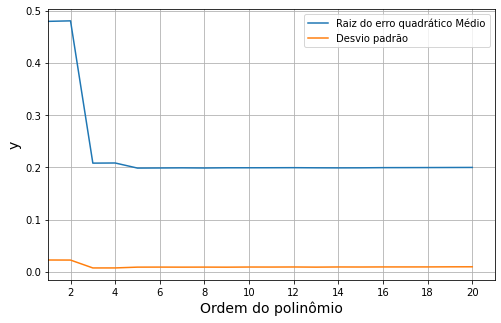

In [11]:

# Plot results.
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_range), mean_vec_k,  label='Raiz do erro quadrático Médio')
plt.plot(range(1, max_range), std_vec_k,  label='Desvio padrão')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.xticks(range(0, max_range, 2))
plt.xlim([1, max_range])
plt.legend()
plt.grid()
# Save figure
#Show the plot.
plt.show()
#minimo é 12

## leave-p-out

In [12]:
# Instantiate the LOOCV object.
lpocv = LeavePOut(p=1)

mean_vec_p = []
std_vec_p = []
for d in range(1, max_range):
    # Instantiate a polynomial.
    poly_features = PolynomialFeatures(degree=d, include_bias=include_bias)
    # Instantiate a scaler.
    std_scaler = StandardScaler()
    # Instantiate a linear regressor.
    lin_reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    lin_scores = cross_val_score(polynomial_regression, x, y, scoring='neg_mean_squared_error', cv=lpocv)
        
    scores = np.sqrt(-lin_scores)
    mean_vec_p.append(scores.mean())
    std_vec_p.append(scores.std())

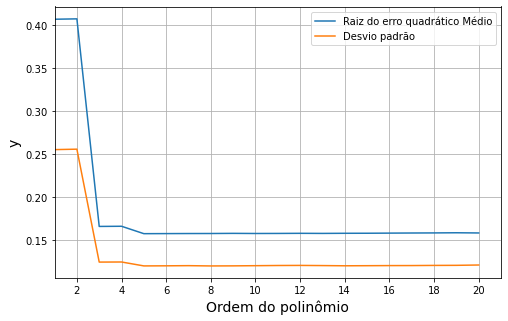

In [13]:

# Plot results.
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_range), mean_vec_p,  label='Raiz do erro quadrático Médio')
plt.plot(range(1, max_range), std_vec_p,  label='Desvio padrão')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.xticks(range(0, max_range, 2))
plt.xlim([1, max_range])
plt.legend()
plt.grid()
# Save figure
#Show the plot.
plt.show()
#minimo é 12

## Curvas de aprendizado

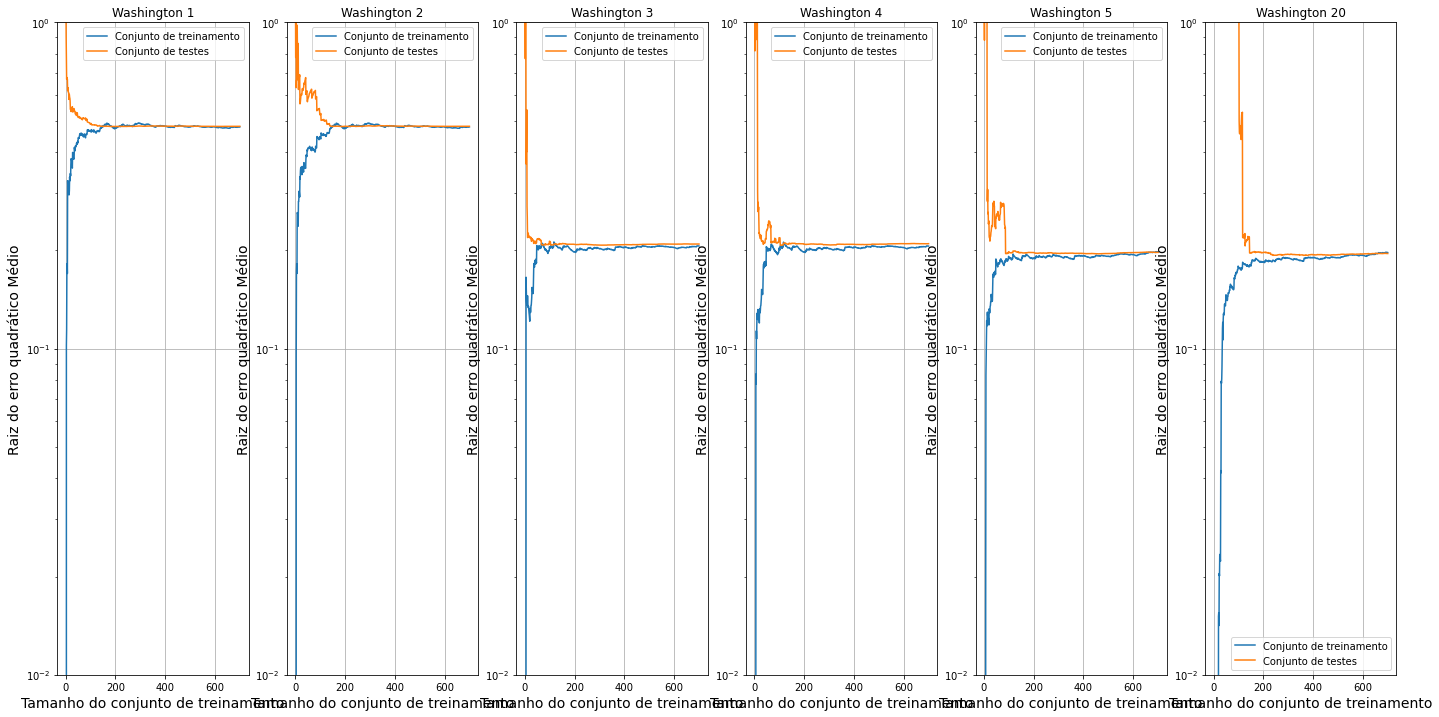

In [14]:

degrees = [1, 2, 3, 4, 5, 20]

plt.figure(figsize=(24, 12))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)

    # Instantiate a polynomial.
    poly_features = PolynomialFeatures(degree=degrees[i], include_bias=include_bias)
    # Instantiate a scaler.
    std_scaler = StandardScaler()
    # Instantiate a linear regressor.
    lin_reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    error_training = []
    error_test = []
    for m in range(1,len(x_train)+1):

        # Perform polynomial regression.
        polynomial_regression.fit(x_train[:m], y_train[:m])
        
        

        # Use the trained model for prediction of the training set.
        y_train_predict = polynomial_regression.predict(x_train[:m])

        # Use the trained model for prediction of the validation set.
        y_test_predict = polynomial_regression.predict(x_test)
        
        

        # Calculate MSE for training set.
        error_training.append(mean_squared_error(y_train[:m], y_train_predict))

        # Calculate MSE for validation set.
        error_test.append(mean_squared_error(y_test, y_test_predict))  
        

    plt.plot(range(1,len(x_train)+1), np.sqrt(error_training), label='Conjunto de treinamento')
    plt.plot(range(1,len(x_train)+1), np.sqrt(error_test), label='Conjunto de testes')
    plt.yscale('log')
    plt.xlabel('Tamanho do conjunto de treinamento', fontsize=14)
    plt.ylabel('Raiz do erro quadrático Médio', fontsize=14)
    plt.grid()
    plt.title('Washington '+str(degrees[i]))
    plt.ylim([10**-2, 10**0])
    plt.legend(loc='best')
    
#Show the plot.
plt.show()

**C. Plote as curvas de aprendizado para as ordens de polinômio que melhor
aproximam o modelo gerador, inclua também as ordens 1, 2 e 20. O que você
pode concluir após analisar estes resultados?**

R: Podemos concluir que o polinómio 1 e 2 apresentam um RMSE muito mais alto que as outras ordens polinomiais, sofrendo de underfitting. Quanto ao polinómio 20, podemos ver o overfitting, pois a curva do conjunto de testes só começa a aproximar-se da curva de treinamento após quase 200 iterações. O polinómio de ordem 3 parece ser o mais adequado, pois a diferença entre as curvas é mais estável durante todas iterações.

In [15]:

model_order = 3


poly_features = PolynomialFeatures(degree=model_order, include_bias=include_bias)

# Instantiate a scaler that will standardize the features.
std_scaler = StandardScaler()
# Instantiate a linear regressor.
lin_reg = LinearRegression()

# Create a pipeline of actions.
model = Pipeline([
    ("poly_features", poly_features),
    ("std_scaler", std_scaler),
    ("lin_reg", lin_reg),
])

# Train model.
model.fit(x, y)

y_predict = model.predict(x)

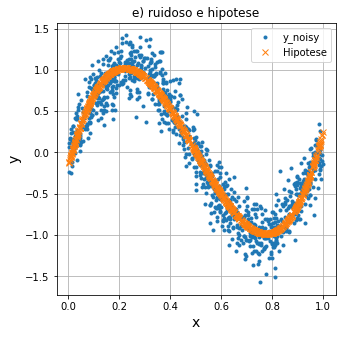

In [16]:


# Plot original data versus noisy version.
fig = plt.figure(figsize=(5,5))
plt.plot(x, y, '.', label='y_noisy')
plt.plot(x, y_predict, 'x',  label='Hipotese')
#plt.plot(x_predict, 40600*np.ones(len(x_predict)), 'r',  label='Total de leitos')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend()
plt.grid()
plt.title('e) ruidoso e hipotese')
#Show the plot.
plt.show()
